In [107]:
!pip install openpyxl
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt

In [108]:
file_path = r'C:\Users\tevfi\Desktop\Ironhack\miniproject2\GSAF5.xls'
shark_attacks_df = pd.read_excel(file_path)

shark_attacks_df.head()

,Date,Year,Type,Country,State,Location,Activity,Name,Sex,Age,...,Species,Source,pdf,href formula,href,Case Number,Case Number.1,original order,Unnamed: 21,Unnamed: 22
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2024-11-01 00:00:00,2024.0,Unprovoked,Hawaii,Maui,Sand Piles Waiehu Beach Park,Surfing,Kenji,M,61,...,Not stated,Glen Folkard: Independent: Fox News: Sky News ...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2024-10-31 00:00:00,2024.0,Unprovoked,Australia,Queensland,Whitsunday Islands,Snorkeling,Not stated,F,57,...,Reported as a large Tiger shark,Simon de Marchi: 9 News: 7 News: ABC News:,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2024-10-25 00:00:00,2024.0,Unprovoked,USA,Florida,"Bathtub Beach, Martin County",Surfing,Cole Taschman,M,27,...,Bull or tiger 7-8ft,Bob Myatt: Yardbarker: 12 on your side: WPTV: ...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2024-10-14 00:00:00,2024.0,Unprovoked,Honduras,Tela,Atlantida,Swimming,Roberto Carlose Bu Mejia,M,38,...,Bull shark,Georgienne Bradley: Daily Mail UK: FTN News.com,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [109]:
shark_attacks_df.drop(['Unnamed: 21', 'Unnamed: 22', 'Unnamed: 11', 'href', 'href formula', 'pdf', 'original order', 'Case Number.1', 'Case Number'], axis=1, inplace=True)

In [110]:
shark_attacks_df.columns

Index(['Date', 'Year', 'Type', 'Country', 'State', 'Location', 'Activity',
       'Name', 'Sex', 'Age', 'Injury', 'Time', 'Species ', 'Source'],
      dtype='object')

In [111]:
shark_attacks_df['Date'].sample(10) # Looking at a sample of the date data to assess its format

1267     21-Sep-2013
2334     28-Mar-2004
6738     17-Nov-1839
6708     19-Jul-1847
2410        Jul-2003
5549     23-Feb-1936
2420     25-May-2003
3910     02-Sep-1974
2561     27-Aug-2001
40       09-Jan-2024
Name: Date, dtype: object

In [112]:
shark_attacks_df['Date'] = pd.to_datetime(shark_attacks_df['Date'], errors='coerce') # Attempt conversion to datetime format

display(shark_attacks_df['Date'])

0             NaT
1      2024-11-01
2      2024-10-31
3      2024-10-25
4      2024-10-14
          ...    
6972          NaT
6973          NaT
6974          NaT
6975          NaT
6976          NaT
Name: Date, Length: 6977, dtype: datetime64[ns]

In [113]:
shark_attacks_df['Date'].sample(10)  # Inspect a sample to confirm the format

3943   1973-12-21
6299   1895-08-11
4037   1970-12-03
1693   2010-02-01
3587   1983-06-22
1080   2015-06-24
761    2017-07-20
367    2020-11-23
3705   1980-11-18
6388   1888-12-09
Name: Date, dtype: datetime64[ns]

In [114]:
date_count = shark_attacks_df['Date'].nunique()
print(date_count)

5168


In [115]:
null_date_count = shark_attacks_df['Date'].isnull().sum()  # Count any missing values created in the conversion
print(null_date_count)

876


In [116]:
# For a seasonality-focused analysis, dropping rows with null dates is likely the best approach
shark_attacks_df = shark_attacks_df.dropna(subset=['Date'])

In [117]:
shark_attacks_df.shape 

(6101, 14)

In [118]:
shark_attacks_df['Date'].isnull().sum() # Confirm the dataset update

0

In [119]:
# Extract the Month from the Date Column
shark_attacks_df['Month'] = shark_attacks_df['Date'].dt.month 

In [120]:
shark_attacks_df.head()

,Date,Year,Type,Country,State,Location,Activity,Name,Sex,Age,Injury,Time,Species,Source,Month
1,2024-11-01,2024.0,Unprovoked,Hawaii,Maui,Sand Piles Waiehu Beach Park,Surfing,Kenji,M,61,Right leg severted below knee,?,Not stated,Glen Folkard: Independent: Fox News: Sky News ...,11
2,2024-10-31,2024.0,Unprovoked,Australia,Queensland,Whitsunday Islands,Snorkeling,Not stated,F,57,30cm (1ft) bite to lower calf,16.30hrs,Reported as a large Tiger shark,Simon de Marchi: 9 News: 7 News: ABC News:,10
3,2024-10-25,2024.0,Unprovoked,USA,Florida,"Bathtub Beach, Martin County",Surfing,Cole Taschman,M,27,Both feet bitten,AM,Bull or tiger 7-8ft,Bob Myatt: Yardbarker: 12 on your side: WPTV: ...,10
4,2024-10-14,2024.0,Unprovoked,Honduras,Tela,Atlantida,Swimming,Roberto Carlose Bu Mejia,M,38,Back and thigh extensive tissue loss,?,Bull shark,Georgienne Bradley: Daily Mail UK: FTN News.com,10
5,2024-10-11,2024.0,Unprovoked,USA,Florida,Brevard County Orlando,Surfing,Teddy Witteman,M,16,Bite to left arm,?,Bull shark 6ft,Todd SmithFlorida today: News 4:,10


In [121]:
# Group by Month and count the occurrences
month_counts = shark_attacks_df['Month'].value_counts().sort_index()
month_counts

Month
1     798
2     380
3     420
4     449
5     413
6     491
7     696
8     602
9     542
10    458
11    412
12    440
Name: count, dtype: int64

In [122]:
print(shark_attacks_df[['Country', 'Month']].isnull().sum())

Country    28
Month       0
dtype: int64


In [123]:
shark_attacks_df.dropna(subset=['Country'], inplace=True)

In [124]:
shark_attacks_df['Country'] = shark_attacks_df['Country'].str.strip().str.title() # Standardize country names

In [125]:
country_count = shark_attacks_df["Country"].value_counts()
selected_countries = country_count[countries_to_analyze]
print(selected_countries)

Country
Australia       1320
Mexico            85
South Africa     562
Portugal           4
Name: count, dtype: int64


In [126]:
countries_to_analyze = ['Australia', 'Mexico', 'South Africa', 'Portugal']

shark_attacks_df_filtered = shark_attacks_df[shark_attacks_df['Country'].isin(countries_to_analyze)] # filtering to show only rows where the country is either "Australia," "Mexico," "Portugal," or "South Africa."

monthly_counts = shark_attacks_df_filtered.groupby(['Country', 'Month']).size().unstack(fill_value=0)
monthly_counts

Month,1,2,3,4,5,6,7,8,9,10,11,12
Country,,,,,,,,,,,,
Australia,235,146,127,108,59,61,51,54,60,99,141,179
Mexico,8,4,6,8,10,6,10,6,7,5,7,8
Portugal,0,0,0,0,0,1,1,1,0,0,0,1
South Africa,125,55,51,48,39,27,37,24,22,29,37,68


In [ ]:
#creating the grafics bar plot 

In [148]:
import seaborn

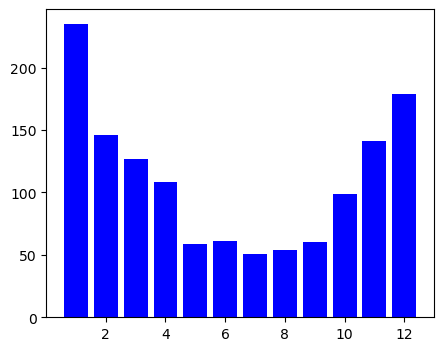

In [168]:
plt.figure(figsize=(5, 4))
months = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]   # X positions for each month
australia_counts = [235, 146, 127, 108, 59, 61, 51, 54, 60, 99, 141, 179]   # Heights of bars for Australia
plt.bar(months, australia_counts, color='blue', label='Australia')
plt.show()

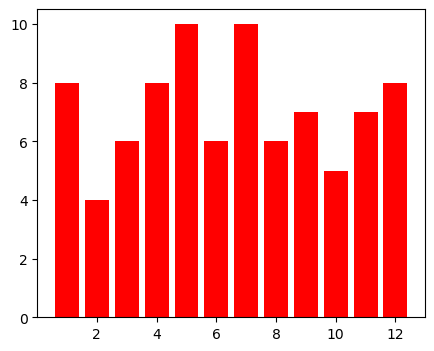

In [170]:
plt.figure(figsize=(5, 4))
months = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12] 
mexico_counts = [8,	4,	6,	8,	10,	6,	10,	6,	7,	5,	7,	8]
plt.bar(months, mexico_counts, color='red', label='Mexico')
plt.show()
    

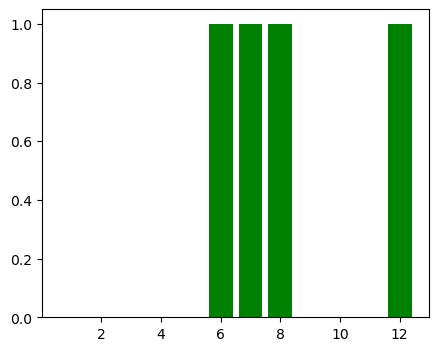

In [172]:
plt.figure(figsize=(5, 4))
months = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12] 
portugal_counts = [0, 0, 0,	0,	0,	1,	1,	1,	0,	0,	0,	1]
plt.bar(months, portugal_counts, color='green', label='Portugal')
plt.show()

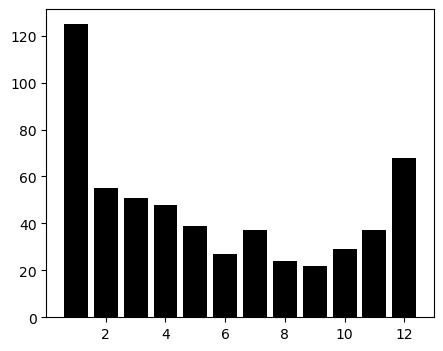

In [174]:
plt.figure(figsize=(5, 4))
months = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12] 
south_africa_counts = [125,	55,	51,	48,	39,	27,	37,	24,	22,	29,	37,	68]
plt.bar(months, south_africa_counts, color='black', label='South Africa')
plt.show()